<a href="https://colab.research.google.com/github/sidhu2690/Torch_Notes/blob/main/01_torch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


In [21]:
torch.manual_seed(42)

X = np.arange(1, 1001)
y = 2 * X + 10

X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]

In [22]:
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

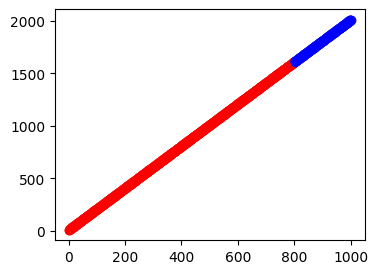

In [24]:
plt.figure(figsize=(4, 3))
plt.scatter(X_train.numpy(), y_train.numpy(), color='red')
plt.scatter(X_test.numpy(), y_test.numpy(), color = 'blue')
plt.show()

# Model

In [51]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.w = nn.Parameter(torch.randn(1, dtype = torch.float32))
    self.b = nn.Parameter(torch.randn(1, dtype = torch.float32))

  def forward(self, x):
    return self.w * x + self.b

In [52]:
model = Model()

In [53]:
model.state_dict()

OrderedDict([('w', tensor([0.2345])), ('b', tensor([0.2303]))])

In [54]:
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.001)
criterion = nn.L1Loss()
epochs = 100

In [55]:
model(X_train).shape, y_train.shape

(torch.Size([800]), torch.Size([800]))

In [56]:
for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 20 == 0:
    print(f" Epoch: {epoch} | Loss: {loss}")

 Epoch: 0 | Loss: 716.8674926757812
 Epoch: 20 | Loss: 68.85173034667969
 Epoch: 40 | Loss: 61.80927658081055
 Epoch: 60 | Loss: 55.604732513427734
 Epoch: 80 | Loss: 50.05183410644531


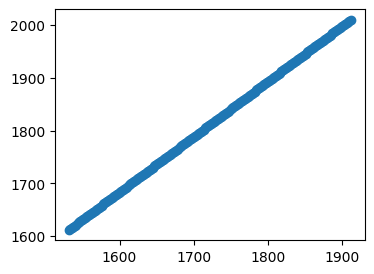

In [57]:
# Check result

model.eval()
with torch.inference_mode():
  y_predicted = model(X_test)

plt.figure(figsize=(4, 3))
plt.scatter(y_predicted, y_test)
plt.show()

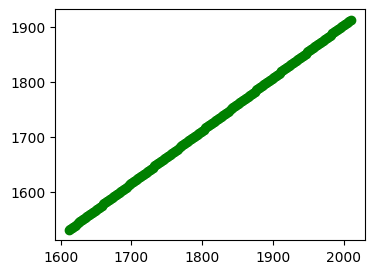

In [58]:
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_predicted, color = 'g')
plt.show()